Name : **Yash Santosh Rahate**

Roll No : **44**

Div : **D15B**

**DMBI Practical 03**



---



**Aim:** To perform exploratory data analysis and visualization on the dataset using python.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/placement-dataset.csv')

In [ ]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
df.shape

(100, 4)

In [ ]:
df.isnull().sum()

,0
city,0
cgpa,8
iq,4
placement,0


In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned.isnull().sum()

,0
city,0
cgpa,0
iq,0
placement,0


In [ ]:
df_cleaned.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
5,Chicago,7.1,48.0,1


In [ ]:
df_cleaned.describe()

,cgpa,iq,placement
count,88.000000,88.000000,88.000000
mean,6.001136,123.454545,0.500000
std,1.166042,41.520777,0.502865
min,3.300000,37.000000,0.000000
25%,5.075000,100.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


#Descriptive analysis - Central tendency

Central tendency is a statistical measure that identifies a single value as representative of an entire dataset. It provides insights into the dataset’s central or typical value. The three common measures of central tendency are:

1. Mean (Average): The sum of all values divided by the number of observations.

2. Median: The middle value when data is arranged in ascending order.

3. Mode: The most frequently occurring value in the dataset.

In [ ]:
# Calculate central tendency measures
mean_cgpa = df_cleaned['cgpa'].mean()
median_cgpa = df_cleaned['cgpa'].median()
mode_cgpa = df_cleaned['cgpa'].mode().iloc[0] if not df_cleaned['cgpa'].mode().empty else None

mean_iq = df_cleaned['iq'].mean()
median_iq = df_cleaned['iq'].median()
mode_iq = df_cleaned['iq'].mode().iloc[0] if not df_cleaned['iq'].mode().empty else None

# Print results
print(f"Mean CGPA: {mean_cgpa}, Median CGPA: {median_cgpa}, Mode CGPA: {mode_cgpa}")
print(f"Mean IQ: {mean_iq}, Median IQ: {median_iq}, Mode IQ: {mode_iq}")


Mean CGPA: 6.001136363636363, Median CGPA: 6.0, Mode CGPA: 4.9
Mean IQ: 123.45454545454545, Median IQ: 127.5, Mode IQ: 114.0


# Descriptive analysis - Dispersion

Dispersion refers to the spread of data points in a dataset. It helps understand how much variation exists from the central value. Common measures of dispersion include:

1. Range: The difference between the maximum and minimum values.
2. Variance (
𝜎
2
σ
2
 ): The average squared difference from the mean.
3. Standard Deviation (
𝜎
σ): The square root of variance, indicating how much data points deviate from the mean.
4. Interquartile Range (IQR): The range between the 75th percentile (Q3) and 25th percentile (Q1), useful for detecting outliers.

In [ ]:
# Import required libraries
import numpy as np

# Calculate dispersion measures for CGPA
range_cgpa = df_cleaned['cgpa'].max() - df_cleaned['cgpa'].min()
variance_cgpa = df_cleaned['cgpa'].var()
std_dev_cgpa = df_cleaned['cgpa'].std()
iqr_cgpa = np.percentile(df_cleaned['cgpa'], 75) - np.percentile(df_cleaned['cgpa'], 25)

# Calculate dispersion measures for IQ
range_iq = df_cleaned['iq'].max() - df_cleaned['iq'].min()
variance_iq = df_cleaned['iq'].var()
std_dev_iq = df_cleaned['iq'].std()
iqr_iq = np.percentile(df_cleaned['iq'], 75) - np.percentile(df_cleaned['iq'], 25)

# Print results
print(f"CGPA -> Range: {range_cgpa}, Variance: {variance_cgpa}, Standard Deviation: {std_dev_cgpa}, IQR: {iqr_cgpa}")
print(f"IQ -> Range: {range_iq}, Variance: {variance_iq}, Standard Deviation: {std_dev_iq}, IQR: {iqr_iq}")


CGPA -> Range: 5.2, Variance: 1.3596538662486939, Standard Deviation: 1.166041965903755, IQR: 1.825000000000001
IQ -> Range: 196.0, Variance: 1723.974921630094, Standard Deviation: 41.520776987311955, IQR: 48.5


Correlation measures the strength and direction of a relationship between two numerical variables. It helps identify dependencies between features in a dataset. The correlation coefficient (
𝑟
r) ranges from -1 to 1:


• 𝑟
=
1
r=1 → Perfect positive correlation (as one increases, the other increases).

• 𝑟
=
−
1
r=−1 → Perfect negative correlation (as one increases, the other decreases).

• 𝑟
=
0
r=0 → No correlation (no relationship between variables).

The most commonly used method to measure correlation is Pearson’s correlation coefficient (
𝜌
ρ)
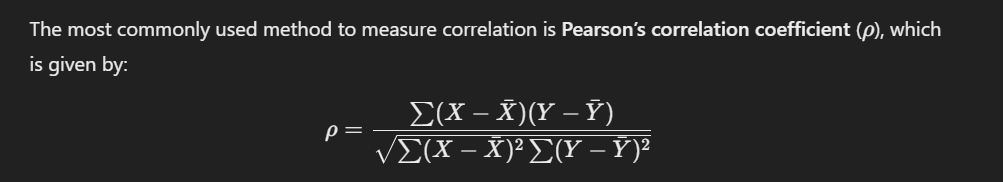

Other correlation methods:

1. Spearman’s Rank Correlation: Used for non-linear relationships.

2. Kendall’s Tau: Measures ordinal relationships.

In [ ]:
# Pearson's correlation coefficient formula
correlation_pearson = df_cleaned[['cgpa', 'iq', 'placement']].corr(method='pearson')
print("Pearson Correlation Matrix:\n", correlation_pearson)


Pearson Correlation Matrix:
                cgpa        iq  placement
cgpa       1.000000 -0.132225   0.822331
iq        -0.132225  1.000000  -0.113955
placement  0.822331 -0.113955   1.000000


Spearman’s Rank Correlation (Used for Non-Linear Relationships)

In [ ]:
# Spearman's Rank Correlation
correlation_spearman = df_cleaned[['cgpa', 'iq', 'placement']].corr(method='spearman')
print("Spearman Correlation Matrix:\n", correlation_spearman)


Spearman Correlation Matrix:
                cgpa        iq  placement
cgpa       1.000000 -0.097880   0.842876
iq        -0.097880  1.000000  -0.092168
placement  0.842876 -0.092168   1.000000


# Data Visualization

Data visualization is a powerful way to understand trends, patterns, and relationships in your dataset. It helps convey complex information in an easy-to-understand format. Here are five common visualization techniques to explore the data, using matplotlib and seaborn.



1. Histogram
A histogram shows the distribution of a numerical variable by dividing the data into bins (intervals) and displaying the frequency of data points in each bin. It is useful for understanding the spread and skewness of the data.

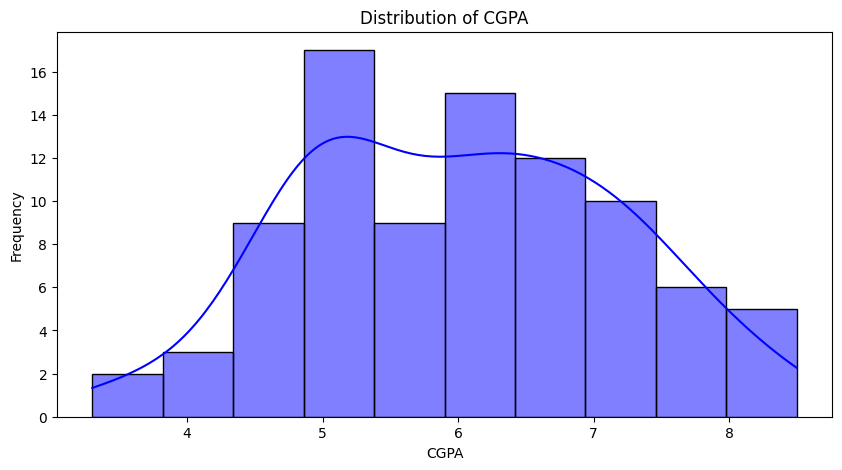

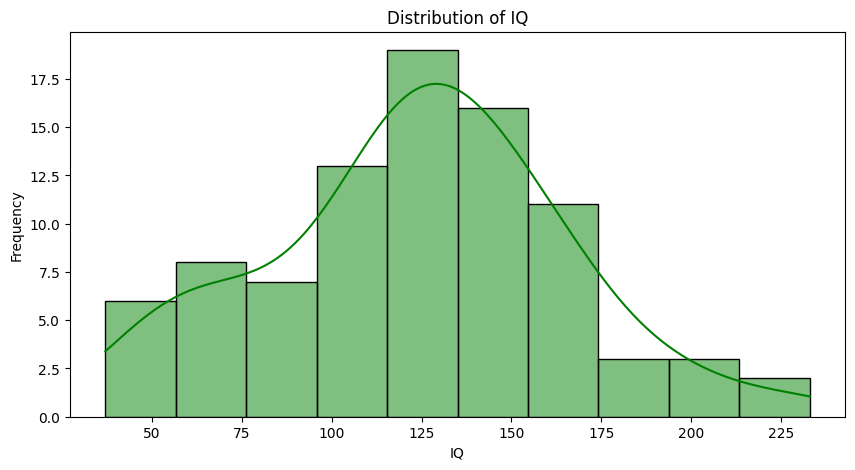

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for CGPA
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['cgpa'], bins=10, kde=True, color='blue')
plt.title("Distribution of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()

# Histogram for IQ
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['iq'], bins=10, kde=True, color='green')
plt.title("Distribution of IQ")
plt.xlabel("IQ")
plt.ylabel("Frequency")
plt.show()


Inference:

1. CGPA is slightly skewed, showing a higher frequency around mid-values.
2. IQ follows a more normal distribution but has some extreme values.

2. Boxplot
A boxplot (or box-and-whisker plot) is used to visualize the distribution, outliers, and spread of a dataset. It displays the median, quartiles, and potential outliers.

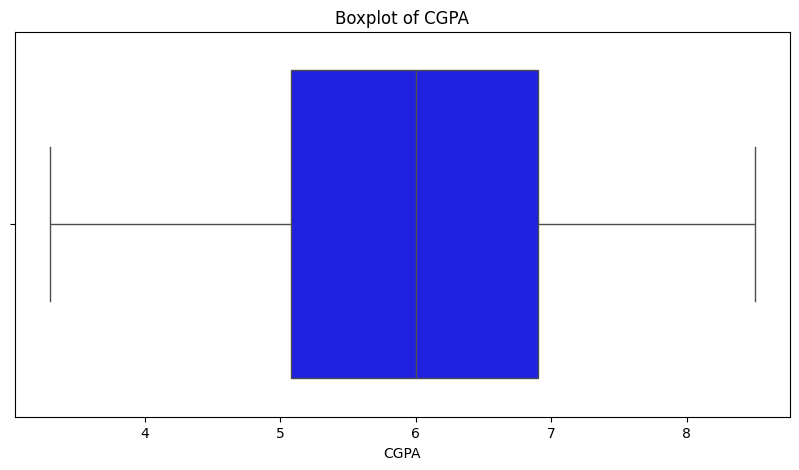

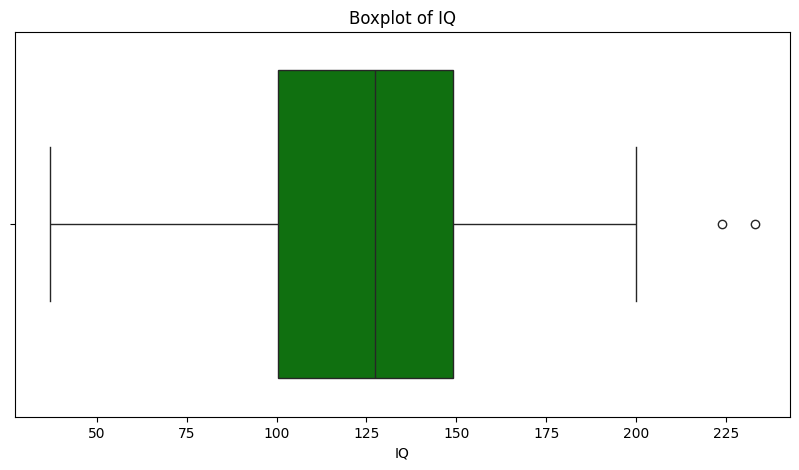

In [ ]:
# Boxplot for CGPA
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['cgpa'], color='blue')
plt.title("Boxplot of CGPA")
plt.xlabel("CGPA")
plt.show()

# Boxplot for IQ
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['iq'], color='green')
plt.title("Boxplot of IQ")
plt.xlabel("IQ")
plt.show()


Inference:
There are no significant outliers in CGPA, but IQ has some outliers on the higher end.
Both distributions are fairly spread out, but IQ has a more compact range.

3. Pairplot
A pairplot is a collection of scatter plots to show pairwise relationships between variables. It helps identify correlations and detect patterns in multiple dimensions.


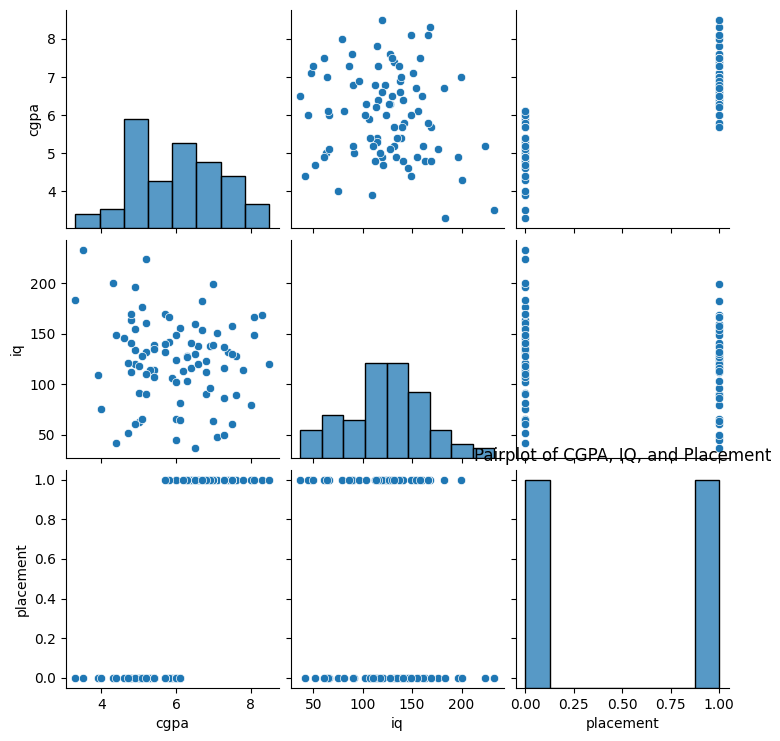

In [ ]:
# Pairplot for CGPA, IQ, and Placement
sns.pairplot(df_cleaned[['cgpa', 'iq', 'placement']])
plt.title("Pairplot of CGPA, IQ, and Placement")
plt.show()


Inference:

1. Scatter plots confirm the weak relationship between IQ and Placement.
2. CGPA shows a stronger influence on placement, aligning with the heatmap results.

4. Correlation Heatmap
A heatmap of the correlation matrix is a great way to visualize the strength of relationships between numerical variables. Strong positive correlations are shown in darker shades of red, and strong negative correlations are shown in darker shades of blue.

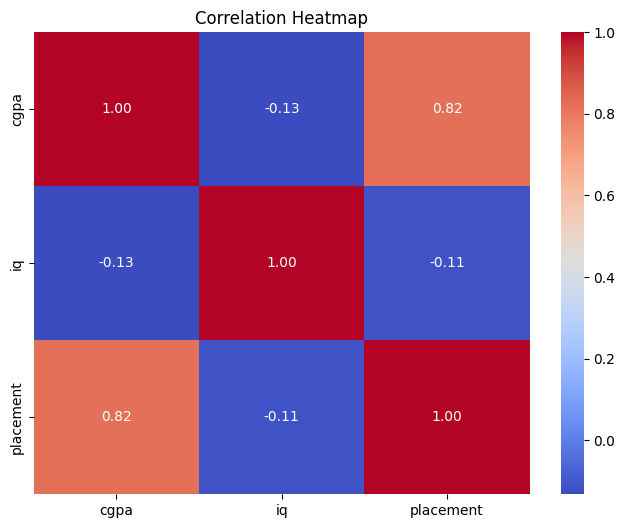

In [ ]:
# Correlation heatmap
correlation_matrix = df_cleaned[['cgpa', 'iq', 'placement']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Inference:

1. Strong positive correlation between CGPA and Placement, indicating that higher CGPA increases the likelihood of placement.
2. Weak or no correlation between IQ and Placement, suggesting IQ is not a major factor in placement.


5. Countplot
A countplot shows the frequency of each category in a categorical variable. It is useful for visualizing the distribution of non-numeric data, such as placement outcomes.

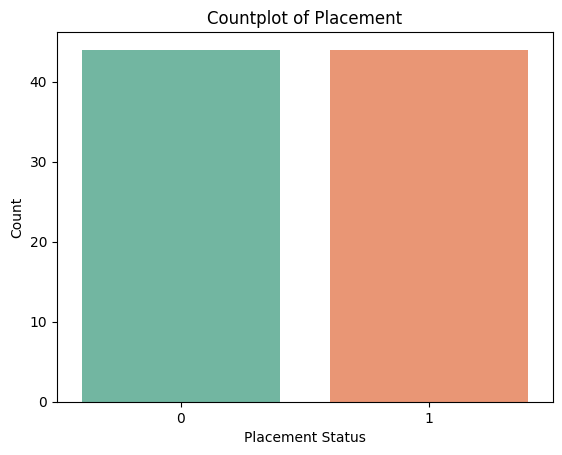

In [ ]:
# Countplot for Placement with updated syntax
sns.countplot(x='placement', data=df_cleaned, palette='Set2', hue='placement', legend=False)
plt.title("Countplot of Placement")
plt.xlabel("Placement Status")
plt.ylabel("Count")
plt.show()

Inference:

1. The countplot for placement shows how many students were placed vs. how many were not placed.
2. The ratio of students placed and not placed is 1:1, indicating equal number of placed and unplaced students

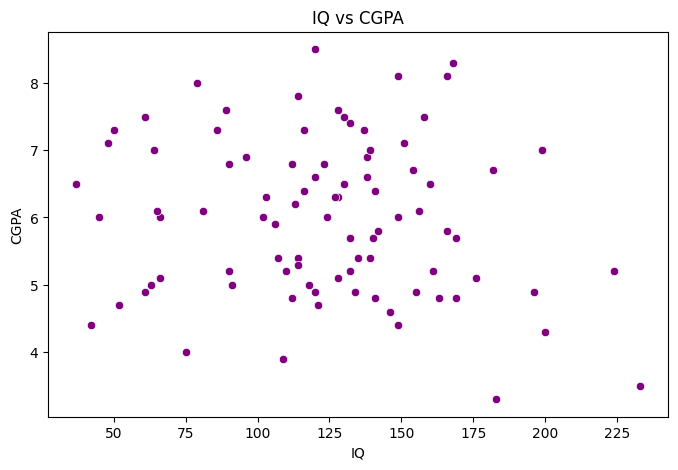

In [ ]:
# Scatter plot for IQ vs CGPA
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned['iq'], y=df_cleaned['cgpa'], color='purple')
plt.title("IQ vs CGPA")
plt.xlabel("IQ")
plt.ylabel("CGPA")
plt.show()

Inference:
The points are scattered randomly, there is little to no relationship between the IQ and CGPA.

Conclusion from Visualizations:

CGPA is a more significant predictor of placement than IQ. While IQ follows a normal distribution, CGPA distribution is slightly skewed. Outliers in IQ might need further investigation.